<a href="https://colab.research.google.com/github/sqhang/Gimmereceipt/blob/main/Bill_com.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bill.com Challenge

In [ ]:
!pip install paddleocr
!pip install paddlepaddle

In [170]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Generating OCR for images that does not come with them

In [171]:
from paddleocr import PaddleOCR,draw_ocr

ocr = PaddleOCR(use_angle_cls=True, lang='en') # need to run only once to download and load model into memory

def generate_ocr_from_image(image_path):
  result = ocr.ocr(image_path, cls=True)
  txt_array = [line[1][0] for line in result[0]]
  txt_concat = " ".join(txt_array)
  return txt_concat

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:17<00:00, 223kiB/s]


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer/en_PP-OCRv3_rec_infer.tar


100%|██████████| 9.96M/9.96M [00:21<00:00, 455kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:14<00:00, 148kiB/s]

[2023/01/29 05:07:15] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_score_thresh=0.5, e2e_pgnet_valid_set

In [177]:
# Testing ocr on an image
ocr_text = generate_ocr_from_image('/content/drive/MyDrive/Datathon/img-20230128T024845Z-001/img/00d0100894168.jpg')

[2023/01/29 05:11:21] ppocr DEBUG: dt_boxes num : 77, elapse : 0.8403098583221436
[2023/01/29 05:11:21] ppocr DEBUG: cls num  : 77, elapse : 0.6223695278167725
[2023/01/29 05:11:28] ppocr DEBUG: rec_res num  : 77, elapse : 6.7411582469940186


In [178]:
import os
import pandas as pd

# Helper function to read content from ocr.csv file
def read_ocr_2_para(filepath, colnames = ['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'text1', 'text2', 'text3']):
    df_test1 = pd.read_csv(filepath, names=colnames)

    df_test1['Text_merge'] = df_test1[df_test1.columns[8:]].apply(
        lambda x: ','.join(x.dropna().astype(str)),
        axis=1)
    
    out = ' '.join(df_test1['Text_merge'])

    return out

# Get all ocr files and cache it in a local dictionary
def get_all_ocr(img_path, ocr_path):
  all_ocr = {}

  all_img_paths = os.listdir(img_path)
  all_ocr_paths = os.listdir(ocr_path)
  for img in tqdm(all_img_paths):
    img_id = os.path.splitext(img)[0]
    img_corred_ocr_name = img_id + '.csv'
    ocr_file_path = ocr_path + '/' + img_corred_ocr_name
    img_file_path = img_path + '/' + img
    if img_corred_ocr_name in all_ocr_paths:
      try:
        all_ocr[img_id] = read_ocr_2_para(ocr_file_path)
      except:
        all_ocr[img_id] = generate_ocr_from_image(img_file_path)
    else:
      all_ocr[img_id] = generate_ocr_from_image(img_file_path)
  return all_ocr

In [180]:
all_ocr = get_all_ocr('/content/drive/MyDrive/Datathon/img-20230128T024845Z-001/img/', '/content/drive/MyDrive/Datathon/ocr-20230128T024910Z-001/ocr/')

  0%|          | 1/637 [00:00<02:25,  4.38it/s]

[2023/01/29 05:12:35] ppocr DEBUG: dt_boxes num : 53, elapse : 0.34757471084594727
[2023/01/29 05:12:35] ppocr DEBUG: cls num  : 53, elapse : 0.43279194831848145
[2023/01/29 05:12:40] ppocr DEBUG: rec_res num  : 53, elapse : 4.954758405685425


  1%|▏         | 8/637 [00:13<22:06,  2.11s/it]

[2023/01/29 05:12:49] ppocr DEBUG: dt_boxes num : 44, elapse : 0.3917877674102783
[2023/01/29 05:12:49] ppocr DEBUG: cls num  : 44, elapse : 0.34015488624572754
[2023/01/29 05:12:53] ppocr DEBUG: rec_res num  : 44, elapse : 4.177954912185669


  2%|▏         | 10/637 [00:19<25:10,  2.41s/it]

[2023/01/29 05:12:55] ppocr DEBUG: dt_boxes num : 39, elapse : 0.6732800006866455
[2023/01/29 05:12:55] ppocr DEBUG: cls num  : 39, elapse : 0.32864928245544434
[2023/01/29 05:12:59] ppocr DEBUG: rec_res num  : 39, elapse : 3.3908371925354004


  2%|▏         | 11/637 [00:24<34:03,  3.26s/it]

[2023/01/29 05:13:00] ppocr DEBUG: dt_boxes num : 36, elapse : 0.48957133293151855
[2023/01/29 05:13:00] ppocr DEBUG: cls num  : 36, elapse : 0.274599552154541
[2023/01/29 05:13:04] ppocr DEBUG: rec_res num  : 36, elapse : 4.238177299499512


  2%|▏         | 13/637 [00:30<31:13,  3.00s/it]

[2023/01/29 05:13:05] ppocr DEBUG: dt_boxes num : 62, elapse : 0.6459970474243164
[2023/01/29 05:13:06] ppocr DEBUG: cls num  : 62, elapse : 0.48000335693359375
[2023/01/29 05:13:11] ppocr DEBUG: rec_res num  : 62, elapse : 5.367180824279785


  6%|▌         | 38/637 [00:37<02:51,  3.50it/s]

[2023/01/29 05:13:13] ppocr DEBUG: dt_boxes num : 58, elapse : 0.44649839401245117
[2023/01/29 05:13:13] ppocr DEBUG: cls num  : 58, elapse : 0.4341163635253906
[2023/01/29 05:13:18] ppocr DEBUG: rec_res num  : 58, elapse : 5.385617971420288


  8%|▊         | 49/637 [00:44<03:56,  2.49it/s]

[2023/01/29 05:13:19] ppocr DEBUG: dt_boxes num : 50, elapse : 0.4119884967803955
[2023/01/29 05:13:20] ppocr DEBUG: cls num  : 50, elapse : 0.39104390144348145
[2023/01/29 05:13:24] ppocr DEBUG: rec_res num  : 50, elapse : 4.92454719543457


  8%|▊         | 53/637 [00:50<06:36,  1.47it/s]

[2023/01/29 05:13:25] ppocr DEBUG: dt_boxes num : 38, elapse : 0.6006462574005127
[2023/01/29 05:13:26] ppocr DEBUG: cls num  : 38, elapse : 0.2973177433013916
[2023/01/29 05:13:29] ppocr DEBUG: rec_res num  : 38, elapse : 3.3602001667022705


 11%|█         | 67/637 [00:55<03:32,  2.68it/s]

[2023/01/29 05:13:30] ppocr DEBUG: dt_boxes num : 41, elapse : 0.4922299385070801
[2023/01/29 05:13:31] ppocr DEBUG: cls num  : 41, elapse : 0.3305490016937256
[2023/01/29 05:13:34] ppocr DEBUG: rec_res num  : 41, elapse : 3.816965341567993


 11%|█         | 71/637 [01:00<05:40,  1.66it/s]

[2023/01/29 05:13:35] ppocr DEBUG: dt_boxes num : 51, elapse : 0.36882495880126953
[2023/01/29 05:13:36] ppocr DEBUG: cls num  : 51, elapse : 0.4181809425354004
[2023/01/29 05:13:41] ppocr DEBUG: rec_res num  : 51, elapse : 5.228108167648315


 12%|█▏        | 77/637 [01:06<07:12,  1.30it/s]

[2023/01/29 05:13:42] ppocr DEBUG: dt_boxes num : 59, elapse : 0.679018497467041
[2023/01/29 05:13:42] ppocr DEBUG: cls num  : 59, elapse : 0.5093975067138672
[2023/01/29 05:13:48] ppocr DEBUG: rec_res num  : 59, elapse : 6.016452312469482


 13%|█▎        | 82/637 [01:14<09:11,  1.01it/s]

[2023/01/29 05:13:49] ppocr DEBUG: dt_boxes num : 68, elapse : 0.2996690273284912
[2023/01/29 05:13:50] ppocr DEBUG: cls num  : 68, elapse : 0.5267584323883057
[2023/01/29 05:13:58] ppocr DEBUG: rec_res num  : 68, elapse : 8.010016441345215


 14%|█▎        | 86/637 [01:23<12:11,  1.33s/it]

[2023/01/29 05:13:58] ppocr DEBUG: dt_boxes num : 63, elapse : 0.5430524349212646
[2023/01/29 05:13:59] ppocr DEBUG: cls num  : 63, elapse : 0.7978782653808594
[2023/01/29 05:14:08] ppocr DEBUG: rec_res num  : 63, elapse : 8.856868028640747


 17%|█▋        | 106/637 [01:34<03:47,  2.34it/s]

[2023/01/29 05:14:10] ppocr DEBUG: dt_boxes num : 96, elapse : 0.3592255115509033
[2023/01/29 05:14:11] ppocr DEBUG: cls num  : 96, elapse : 0.9006390571594238
[2023/01/29 05:14:20] ppocr DEBUG: rec_res num  : 96, elapse : 9.199891567230225


 19%|█▊        | 118/637 [01:45<05:16,  1.64it/s]

[2023/01/29 05:14:21] ppocr DEBUG: dt_boxes num : 54, elapse : 0.3725094795227051
[2023/01/29 05:14:21] ppocr DEBUG: cls num  : 54, elapse : 0.41002702713012695
[2023/01/29 05:14:27] ppocr DEBUG: rec_res num  : 54, elapse : 5.5987772941589355


 21%|██▏       | 136/637 [01:53<02:53,  2.89it/s]

[2023/01/29 05:14:29] ppocr DEBUG: dt_boxes num : 66, elapse : 0.9213154315948486
[2023/01/29 05:14:29] ppocr DEBUG: cls num  : 66, elapse : 0.7582335472106934


 21%|██▏       | 136/637 [02:03<02:53,  2.89it/s]

[2023/01/29 05:14:38] ppocr DEBUG: rec_res num  : 66, elapse : 8.163891553878784


 25%|██▍       | 157/637 [02:03<02:11,  3.64it/s]

[2023/01/29 05:14:38] ppocr DEBUG: dt_boxes num : 77, elapse : 0.29808735847473145
[2023/01/29 05:14:39] ppocr DEBUG: cls num  : 77, elapse : 0.5840108394622803
[2023/01/29 05:14:48] ppocr DEBUG: rec_res num  : 77, elapse : 8.511322259902954


 25%|██▌       | 162/637 [02:13<05:53,  1.34it/s]

[2023/01/29 05:14:48] ppocr DEBUG: dt_boxes num : 47, elapse : 0.43704891204833984
[2023/01/29 05:14:49] ppocr DEBUG: cls num  : 47, elapse : 0.35411524772644043
[2023/01/29 05:14:54] ppocr DEBUG: rec_res num  : 47, elapse : 5.147264003753662


 28%|██▊       | 178/637 [02:20<03:18,  2.31it/s]

[2023/01/29 05:14:55] ppocr DEBUG: dt_boxes num : 49, elapse : 0.4105408191680908
[2023/01/29 05:14:55] ppocr DEBUG: cls num  : 49, elapse : 0.4217050075531006
[2023/01/29 05:15:00] ppocr DEBUG: rec_res num  : 49, elapse : 5.045454263687134


 29%|██▊       | 182/637 [02:26<05:17,  1.43it/s]

[2023/01/29 05:15:01] ppocr DEBUG: dt_boxes num : 47, elapse : 0.4199237823486328
[2023/01/29 05:15:01] ppocr DEBUG: cls num  : 47, elapse : 0.3589038848876953
[2023/01/29 05:15:06] ppocr DEBUG: rec_res num  : 47, elapse : 4.717033863067627


 30%|███       | 192/637 [02:32<04:19,  1.72it/s]

[2023/01/29 05:15:07] ppocr DEBUG: dt_boxes num : 63, elapse : 0.39042186737060547
[2023/01/29 05:15:07] ppocr DEBUG: cls num  : 63, elapse : 0.47129225730895996
[2023/01/29 05:15:14] ppocr DEBUG: rec_res num  : 63, elapse : 6.416658401489258


 31%|███       | 198/637 [02:39<05:58,  1.23it/s]

[2023/01/29 05:15:16] ppocr DEBUG: dt_boxes num : 41, elapse : 0.5476133823394775
[2023/01/29 05:15:16] ppocr DEBUG: cls num  : 41, elapse : 0.7480003833770752
[2023/01/29 05:15:20] ppocr DEBUG: rec_res num  : 41, elapse : 3.939363718032837


 32%|███▏      | 201/637 [02:46<07:50,  1.08s/it]

[2023/01/29 05:15:22] ppocr DEBUG: dt_boxes num : 42, elapse : 0.7191567420959473
[2023/01/29 05:15:23] ppocr DEBUG: cls num  : 42, elapse : 0.8327679634094238
[2023/01/29 05:15:30] ppocr DEBUG: rec_res num  : 42, elapse : 7.105885744094849


 33%|███▎      | 211/637 [02:55<06:16,  1.13it/s]

[2023/01/29 05:15:30] ppocr DEBUG: dt_boxes num : 48, elapse : 0.3587167263031006
[2023/01/29 05:15:31] ppocr DEBUG: cls num  : 48, elapse : 0.3749871253967285
[2023/01/29 05:15:36] ppocr DEBUG: rec_res num  : 48, elapse : 4.86722731590271
[2023/01/29 05:15:37] ppocr DEBUG: dt_boxes num : 67, elapse : 0.6333680152893066
[2023/01/29 05:15:38] ppocr DEBUG: cls num  : 67, elapse : 0.5587348937988281


 33%|███▎      | 211/637 [03:06<06:16,  1.13it/s]

[2023/01/29 05:15:45] ppocr DEBUG: rec_res num  : 67, elapse : 7.043257236480713


 33%|███▎      | 213/637 [03:10<13:05,  1.85s/it]

[2023/01/29 05:15:45] ppocr DEBUG: dt_boxes num : 93, elapse : 0.30620265007019043
[2023/01/29 05:15:46] ppocr DEBUG: cls num  : 93, elapse : 0.7375805377960205
[2023/01/29 05:15:55] ppocr DEBUG: rec_res num  : 93, elapse : 8.545614004135132


 34%|███▎      | 214/637 [03:20<18:30,  2.63s/it]

[2023/01/29 05:15:56] ppocr DEBUG: dt_boxes num : 44, elapse : 0.47646546363830566
[2023/01/29 05:15:56] ppocr DEBUG: cls num  : 44, elapse : 0.3720386028289795
[2023/01/29 05:16:00] ppocr DEBUG: rec_res num  : 44, elapse : 3.954113483428955


 34%|███▍      | 219/637 [03:26<13:52,  1.99s/it]

[2023/01/29 05:16:01] ppocr DEBUG: dt_boxes num : 53, elapse : 0.3978137969970703
[2023/01/29 05:16:01] ppocr DEBUG: cls num  : 53, elapse : 0.4035220146179199
[2023/01/29 05:16:06] ppocr DEBUG: rec_res num  : 53, elapse : 5.255350589752197


 36%|███▌      | 227/637 [03:32<08:38,  1.26s/it]

[2023/01/29 05:16:07] ppocr DEBUG: dt_boxes num : 39, elapse : 0.3767507076263428
[2023/01/29 05:16:08] ppocr DEBUG: cls num  : 39, elapse : 0.30019307136535645
[2023/01/29 05:16:12] ppocr DEBUG: rec_res num  : 39, elapse : 4.710047006607056


 38%|███▊      | 239/637 [03:38<04:55,  1.34it/s]

[2023/01/29 05:16:13] ppocr DEBUG: dt_boxes num : 50, elapse : 0.38472771644592285
[2023/01/29 05:16:14] ppocr DEBUG: cls num  : 50, elapse : 0.3862156867980957
[2023/01/29 05:16:19] ppocr DEBUG: rec_res num  : 50, elapse : 5.513520240783691


 40%|████      | 255/637 [03:45<02:39,  2.40it/s]

[2023/01/29 05:16:20] ppocr DEBUG: dt_boxes num : 30, elapse : 0.48882508277893066
[2023/01/29 05:16:20] ppocr DEBUG: cls num  : 30, elapse : 0.23447418212890625
[2023/01/29 05:16:24] ppocr DEBUG: rec_res num  : 30, elapse : 3.3321287631988525


 42%|████▏     | 266/637 [03:49<02:19,  2.66it/s]

[2023/01/29 05:16:25] ppocr DEBUG: dt_boxes num : 47, elapse : 0.4091832637786865
[2023/01/29 05:16:25] ppocr DEBUG: cls num  : 47, elapse : 0.3509712219238281
[2023/01/29 05:16:31] ppocr DEBUG: rec_res num  : 47, elapse : 6.239508867263794


 42%|████▏     | 270/637 [03:57<04:29,  1.36it/s]

[2023/01/29 05:16:33] ppocr DEBUG: dt_boxes num : 53, elapse : 0.6014184951782227
[2023/01/29 05:16:34] ppocr DEBUG: cls num  : 53, elapse : 0.38427066802978516
[2023/01/29 05:16:39] ppocr DEBUG: rec_res num  : 53, elapse : 5.198979377746582


 44%|████▍     | 279/637 [04:05<04:07,  1.44it/s]

[2023/01/29 05:16:40] ppocr DEBUG: dt_boxes num : 23, elapse : 0.48393917083740234
[2023/01/29 05:16:40] ppocr DEBUG: cls num  : 23, elapse : 0.17758893966674805
[2023/01/29 05:16:42] ppocr DEBUG: rec_res num  : 23, elapse : 2.1726906299591064


 45%|████▌     | 289/637 [04:08<02:42,  2.14it/s]

[2023/01/29 05:16:43] ppocr DEBUG: dt_boxes num : 32, elapse : 0.5068075656890869
[2023/01/29 05:16:43] ppocr DEBUG: cls num  : 32, elapse : 0.25006604194641113
[2023/01/29 05:16:46] ppocr DEBUG: rec_res num  : 32, elapse : 2.8193182945251465


 46%|████▋     | 295/637 [04:12<03:00,  1.89it/s]

[2023/01/29 05:16:47] ppocr DEBUG: dt_boxes num : 77, elapse : 0.47482943534851074
[2023/01/29 05:16:47] ppocr DEBUG: cls num  : 77, elapse : 0.5852851867675781
[2023/01/29 05:16:57] ppocr DEBUG: rec_res num  : 77, elapse : 9.842164039611816


 49%|████▉     | 313/637 [04:23<02:26,  2.22it/s]

[2023/01/29 05:16:58] ppocr DEBUG: dt_boxes num : 56, elapse : 0.4242057800292969
[2023/01/29 05:16:59] ppocr DEBUG: cls num  : 56, elapse : 0.4282364845275879
[2023/01/29 05:17:05] ppocr DEBUG: rec_res num  : 56, elapse : 6.245121955871582
[2023/01/29 05:17:07] ppocr DEBUG: dt_boxes num : 42, elapse : 0.7467710971832275
[2023/01/29 05:17:07] ppocr DEBUG: cls num  : 42, elapse : 0.41223788261413574
[2023/01/29 05:17:12] ppocr DEBUG: rec_res num  : 42, elapse : 4.4269208908081055
[2023/01/29 05:17:12] ppocr DEBUG: dt_boxes num : 69, elapse : 0.49753499031066895
[2023/01/29 05:17:13] ppocr DEBUG: cls num  : 69, elapse : 0.5222012996673584


 49%|████▉     | 313/637 [04:40<02:26,  2.22it/s]

[2023/01/29 05:17:22] ppocr DEBUG: rec_res num  : 69, elapse : 9.047962188720703


 50%|████▉     | 316/637 [04:47<09:42,  1.81s/it]

[2023/01/29 05:17:23] ppocr DEBUG: dt_boxes num : 72, elapse : 0.5981099605560303
[2023/01/29 05:17:24] ppocr DEBUG: cls num  : 72, elapse : 0.5285694599151611
[2023/01/29 05:17:32] ppocr DEBUG: rec_res num  : 72, elapse : 7.923656463623047


 50%|█████     | 321/637 [04:57<09:08,  1.74s/it]

[2023/01/29 05:17:33] ppocr DEBUG: dt_boxes num : 50, elapse : 0.6067960262298584
[2023/01/29 05:17:34] ppocr DEBUG: cls num  : 50, elapse : 0.8378105163574219
[2023/01/29 05:17:40] ppocr DEBUG: rec_res num  : 50, elapse : 6.712021827697754


 53%|█████▎    | 335/637 [05:06<03:36,  1.39it/s]

[2023/01/29 05:17:42] ppocr DEBUG: dt_boxes num : 32, elapse : 0.5551810264587402
[2023/01/29 05:17:42] ppocr DEBUG: cls num  : 32, elapse : 0.252152681350708
[2023/01/29 05:17:45] ppocr DEBUG: rec_res num  : 32, elapse : 3.3678860664367676


 54%|█████▍    | 346/637 [05:11<02:02,  2.37it/s]

[2023/01/29 05:17:46] ppocr DEBUG: dt_boxes num : 43, elapse : 0.42698073387145996
[2023/01/29 05:17:47] ppocr DEBUG: cls num  : 43, elapse : 0.3378312587738037
[2023/01/29 05:17:51] ppocr DEBUG: rec_res num  : 43, elapse : 4.639589309692383


 57%|█████▋    | 366/637 [05:17<00:57,  4.69it/s]

[2023/01/29 05:17:52] ppocr DEBUG: dt_boxes num : 98, elapse : 0.5241196155548096
[2023/01/29 05:17:53] ppocr DEBUG: cls num  : 98, elapse : 0.8407454490661621
[2023/01/29 05:18:04] ppocr DEBUG: rec_res num  : 98, elapse : 10.380913734436035


 59%|█████▉    | 376/637 [05:29<02:38,  1.64it/s]

[2023/01/29 05:18:05] ppocr DEBUG: dt_boxes num : 62, elapse : 0.5905163288116455
[2023/01/29 05:18:06] ppocr DEBUG: cls num  : 62, elapse : 0.46944737434387207
[2023/01/29 05:18:13] ppocr DEBUG: rec_res num  : 62, elapse : 7.59062647819519


 60%|█████▉    | 381/637 [05:39<04:15,  1.00it/s]

[2023/01/29 05:18:15] ppocr DEBUG: dt_boxes num : 42, elapse : 0.7491681575775146
[2023/01/29 05:18:15] ppocr DEBUG: cls num  : 42, elapse : 0.3263123035430908
[2023/01/29 05:18:19] ppocr DEBUG: rec_res num  : 42, elapse : 4.068018436431885


 62%|██████▏   | 392/637 [05:45<02:51,  1.43it/s]

[2023/01/29 05:18:20] ppocr DEBUG: dt_boxes num : 60, elapse : 0.5818614959716797
[2023/01/29 05:18:21] ppocr DEBUG: cls num  : 60, elapse : 0.7979545593261719
[2023/01/29 05:18:29] ppocr DEBUG: rec_res num  : 60, elapse : 7.458299398422241


 62%|██████▏   | 396/637 [05:54<04:21,  1.08s/it]

[2023/01/29 05:18:30] ppocr DEBUG: dt_boxes num : 49, elapse : 0.3533766269683838
[2023/01/29 05:18:30] ppocr DEBUG: cls num  : 49, elapse : 0.3594822883605957
[2023/01/29 05:18:36] ppocr DEBUG: rec_res num  : 49, elapse : 5.751028299331665


 66%|██████▌   | 420/637 [06:02<01:12,  3.01it/s]

[2023/01/29 05:18:37] ppocr DEBUG: dt_boxes num : 54, elapse : 0.3290257453918457
[2023/01/29 05:18:37] ppocr DEBUG: cls num  : 54, elapse : 0.390364408493042
[2023/01/29 05:18:43] ppocr DEBUG: rec_res num  : 54, elapse : 5.621520519256592


 67%|██████▋   | 425/637 [06:08<02:04,  1.70it/s]

[2023/01/29 05:18:44] ppocr DEBUG: dt_boxes num : 49, elapse : 0.4920616149902344
[2023/01/29 05:18:44] ppocr DEBUG: cls num  : 49, elapse : 0.3611781597137451
[2023/01/29 05:18:49] ppocr DEBUG: rec_res num  : 49, elapse : 5.506842851638794
[2023/01/29 05:18:50] ppocr DEBUG: dt_boxes num : 44, elapse : 0.5039896965026855
[2023/01/29 05:18:51] ppocr DEBUG: cls num  : 44, elapse : 0.4122624397277832
[2023/01/29 05:18:56] ppocr DEBUG: rec_res num  : 44, elapse : 5.394922494888306


 68%|██████▊   | 433/637 [06:22<03:09,  1.08it/s]

[2023/01/29 05:18:58] ppocr DEBUG: dt_boxes num : 52, elapse : 1.037520170211792
[2023/01/29 05:18:58] ppocr DEBUG: cls num  : 52, elapse : 0.5029430389404297
[2023/01/29 05:19:03] ppocr DEBUG: rec_res num  : 52, elapse : 4.491888046264648
[2023/01/29 05:19:04] ppocr DEBUG: dt_boxes num : 49, elapse : 0.48838067054748535
[2023/01/29 05:19:04] ppocr DEBUG: cls num  : 49, elapse : 0.36896228790283203


 68%|██████▊   | 433/637 [06:33<03:09,  1.08it/s]

[2023/01/29 05:19:10] ppocr DEBUG: rec_res num  : 49, elapse : 6.344570159912109


 70%|███████   | 449/637 [06:36<02:05,  1.49it/s]

[2023/01/29 05:19:11] ppocr DEBUG: dt_boxes num : 43, elapse : 0.45593929290771484
[2023/01/29 05:19:12] ppocr DEBUG: cls num  : 43, elapse : 0.34969139099121094
[2023/01/29 05:19:16] ppocr DEBUG: rec_res num  : 43, elapse : 4.508120536804199


 72%|███████▏  | 460/637 [06:42<01:36,  1.83it/s]

[2023/01/29 05:19:17] ppocr DEBUG: dt_boxes num : 46, elapse : 0.37036633491516113
[2023/01/29 05:19:17] ppocr DEBUG: cls num  : 46, elapse : 0.3388683795928955
[2023/01/29 05:19:22] ppocr DEBUG: rec_res num  : 46, elapse : 5.070278882980347


 73%|███████▎  | 465/637 [06:48<02:05,  1.37it/s]

[2023/01/29 05:19:23] ppocr DEBUG: dt_boxes num : 52, elapse : 0.3704099655151367
[2023/01/29 05:19:23] ppocr DEBUG: cls num  : 52, elapse : 0.3998394012451172
[2023/01/29 05:19:29] ppocr DEBUG: rec_res num  : 52, elapse : 5.8091957569122314


 74%|███████▍  | 474/637 [06:55<01:50,  1.47it/s]

[2023/01/29 05:19:30] ppocr DEBUG: dt_boxes num : 35, elapse : 0.4329702854156494
[2023/01/29 05:19:30] ppocr DEBUG: cls num  : 35, elapse : 0.28163671493530273
[2023/01/29 05:19:35] ppocr DEBUG: rec_res num  : 35, elapse : 4.9936747550964355


 75%|███████▌  | 478/637 [07:01<02:20,  1.13it/s]

[2023/01/29 05:19:36] ppocr DEBUG: dt_boxes num : 66, elapse : 0.44161128997802734
[2023/01/29 05:19:37] ppocr DEBUG: cls num  : 66, elapse : 0.5130875110626221
[2023/01/29 05:19:44] ppocr DEBUG: rec_res num  : 66, elapse : 7.285135746002197
[2023/01/29 05:19:45] ppocr DEBUG: dt_boxes num : 32, elapse : 0.6144764423370361
[2023/01/29 05:19:45] ppocr DEBUG: cls num  : 32, elapse : 0.25176095962524414
[2023/01/29 05:19:48] ppocr DEBUG: rec_res num  : 32, elapse : 3.070761203765869


 76%|███████▋  | 487/637 [07:14<02:29,  1.00it/s]

[2023/01/29 05:19:49] ppocr DEBUG: dt_boxes num : 77, elapse : 0.46839213371276855
[2023/01/29 05:19:50] ppocr DEBUG: cls num  : 77, elapse : 0.570275068283081
[2023/01/29 05:19:58] ppocr DEBUG: rec_res num  : 77, elapse : 8.14957880973816


 77%|███████▋  | 493/637 [07:23<02:54,  1.21s/it]

[2023/01/29 05:19:59] ppocr DEBUG: dt_boxes num : 57, elapse : 0.31299400329589844
[2023/01/29 05:19:59] ppocr DEBUG: cls num  : 57, elapse : 0.442777156829834
[2023/01/29 05:20:05] ppocr DEBUG: rec_res num  : 57, elapse : 6.3842949867248535


 78%|███████▊  | 496/637 [07:31<03:28,  1.48s/it]

[2023/01/29 05:20:06] ppocr DEBUG: dt_boxes num : 30, elapse : 0.5821719169616699
[2023/01/29 05:20:07] ppocr DEBUG: cls num  : 30, elapse : 0.3961367607116699
[2023/01/29 05:20:11] ppocr DEBUG: rec_res num  : 30, elapse : 4.428025245666504


 79%|███████▉  | 506/637 [07:37<01:59,  1.10it/s]

[2023/01/29 05:20:12] ppocr DEBUG: dt_boxes num : 31, elapse : 0.4430067539215088
[2023/01/29 05:20:12] ppocr DEBUG: cls num  : 31, elapse : 0.47406768798828125
[2023/01/29 05:20:17] ppocr DEBUG: rec_res num  : 31, elapse : 4.238088607788086


 80%|███████▉  | 509/637 [07:42<02:20,  1.10s/it]

[2023/01/29 05:20:18] ppocr DEBUG: dt_boxes num : 61, elapse : 0.6532044410705566
[2023/01/29 05:20:18] ppocr DEBUG: cls num  : 61, elapse : 0.6592617034912109
[2023/01/29 05:20:24] ppocr DEBUG: rec_res num  : 61, elapse : 5.950490951538086


 80%|████████  | 511/637 [07:50<03:16,  1.56s/it]

[2023/01/29 05:20:25] ppocr DEBUG: dt_boxes num : 58, elapse : 0.6084499359130859
[2023/01/29 05:20:26] ppocr DEBUG: cls num  : 58, elapse : 0.4339907169342041
[2023/01/29 05:20:31] ppocr DEBUG: rec_res num  : 58, elapse : 5.296079158782959


 81%|████████▏ | 518/637 [07:57<02:15,  1.14s/it]

[2023/01/29 05:20:32] ppocr DEBUG: dt_boxes num : 51, elapse : 0.5188474655151367
[2023/01/29 05:20:33] ppocr DEBUG: cls num  : 51, elapse : 0.4915754795074463
[2023/01/29 05:20:41] ppocr DEBUG: rec_res num  : 51, elapse : 8.230594396591187


 82%|████████▏ | 522/637 [08:07<03:00,  1.57s/it]

[2023/01/29 05:20:42] ppocr DEBUG: dt_boxes num : 53, elapse : 0.33542823791503906
[2023/01/29 05:20:42] ppocr DEBUG: cls num  : 53, elapse : 0.4093453884124756
[2023/01/29 05:20:48] ppocr DEBUG: rec_res num  : 53, elapse : 6.000664949417114


 83%|████████▎ | 526/637 [08:14<03:00,  1.63s/it]

[2023/01/29 05:20:49] ppocr DEBUG: dt_boxes num : 29, elapse : 0.5713410377502441
[2023/01/29 05:20:49] ppocr DEBUG: cls num  : 29, elapse : 0.23015975952148438
[2023/01/29 05:20:53] ppocr DEBUG: rec_res num  : 29, elapse : 3.9349911212921143


 84%|████████▎ | 532/637 [08:19<02:18,  1.32s/it]

[2023/01/29 05:20:54] ppocr DEBUG: dt_boxes num : 45, elapse : 0.39147472381591797
[2023/01/29 05:20:54] ppocr DEBUG: cls num  : 45, elapse : 0.3478078842163086
[2023/01/29 05:20:59] ppocr DEBUG: rec_res num  : 45, elapse : 4.4749979972839355


 84%|████████▍ | 535/637 [08:24<02:25,  1.43s/it]

[2023/01/29 05:21:00] ppocr DEBUG: dt_boxes num : 66, elapse : 0.5030064582824707
[2023/01/29 05:21:00] ppocr DEBUG: cls num  : 66, elapse : 0.5177102088928223
[2023/01/29 05:21:08] ppocr DEBUG: rec_res num  : 66, elapse : 8.14612889289856


 89%|████████▉ | 566/637 [08:34<00:21,  3.34it/s]

[2023/01/29 05:21:10] ppocr DEBUG: dt_boxes num : 89, elapse : 0.4742100238800049
[2023/01/29 05:21:11] ppocr DEBUG: cls num  : 89, elapse : 1.1135039329528809


 89%|████████▉ | 566/637 [08:48<00:21,  3.34it/s]

[2023/01/29 05:21:22] ppocr DEBUG: rec_res num  : 89, elapse : 11.397926807403564


 92%|█████████▏| 586/637 [08:48<00:17,  2.88it/s]

[2023/01/29 05:21:23] ppocr DEBUG: dt_boxes num : 53, elapse : 0.41599225997924805
[2023/01/29 05:21:24] ppocr DEBUG: cls num  : 53, elapse : 0.41698360443115234
[2023/01/29 05:21:30] ppocr DEBUG: rec_res num  : 53, elapse : 6.265624523162842
[2023/01/29 05:21:31] ppocr DEBUG: dt_boxes num : 27, elapse : 0.4029042720794678
[2023/01/29 05:21:31] ppocr DEBUG: cls num  : 27, elapse : 0.26319456100463867
[2023/01/29 05:21:36] ppocr DEBUG: rec_res num  : 27, elapse : 4.820334434509277


 94%|█████████▍| 601/637 [09:01<00:18,  1.93it/s]

[2023/01/29 05:21:37] ppocr DEBUG: dt_boxes num : 59, elapse : 0.6657366752624512
[2023/01/29 05:21:38] ppocr DEBUG: cls num  : 59, elapse : 0.6222877502441406
[2023/01/29 05:21:45] ppocr DEBUG: rec_res num  : 59, elapse : 7.35772442817688


 96%|█████████▌| 612/637 [09:11<00:15,  1.63it/s]

[2023/01/29 05:21:46] ppocr DEBUG: dt_boxes num : 30, elapse : 0.41286492347717285
[2023/01/29 05:21:46] ppocr DEBUG: cls num  : 30, elapse : 0.22954988479614258
[2023/01/29 05:21:50] ppocr DEBUG: rec_res num  : 30, elapse : 3.7479612827301025
[2023/01/29 05:21:51] ppocr DEBUG: dt_boxes num : 46, elapse : 0.5550813674926758
[2023/01/29 05:21:52] ppocr DEBUG: cls num  : 46, elapse : 1.0475339889526367
[2023/01/29 05:21:57] ppocr DEBUG: rec_res num  : 46, elapse : 4.760997533798218


 98%|█████████▊| 624/637 [09:23<00:08,  1.53it/s]

[2023/01/29 05:21:59] ppocr DEBUG: dt_boxes num : 38, elapse : 0.7183759212493896
[2023/01/29 05:21:59] ppocr DEBUG: cls num  : 38, elapse : 0.32582640647888184
[2023/01/29 05:22:04] ppocr DEBUG: rec_res num  : 38, elapse : 4.273516654968262


100%|██████████| 637/637 [09:29<00:00,  1.12it/s]


## Split ocrs into training set and validation set

In [183]:
train_transactions_csv = pd.read_csv('/content/drive/MyDrive/Datathon/Users.csv')
test_transactions_csv = pd.read_csv('/content/drive/MyDrive/Datathon/test_transactions.csv')

In [184]:
test_doc_id = []
for i in range(len(test_transactions_csv)):
  user_row = test_transactions_csv.iloc[i]
  documentid = user_row['documentid']
  test_doc_id.append(documentid)

In [185]:
train_doc_id = []
for i in range(len(train_transactions_csv)):
  user_row = train_transactions_csv.iloc[i]
  documentid = user_row['documentid']
  train_doc_id.append(documentid)

In [187]:
train_data = {}
test_data = {}

for documentid in test_doc_id:
  test_data[documentid] = all_ocr[documentid]

for documentid in train_doc_id:
  train_data[documentid] = all_ocr[documentid]

## Store ocrs as a json object for later reuse

In [188]:
import json

with open('test_data.json', 'w') as fp:
    json.dump(test_data, fp)

with open('train_data.json', 'w') as fp:
    json.dump(train_data, fp)

## Get a glimpse on what user.csv looks like

In [181]:
users = pd.read_csv("/content/drive/MyDrive/Datathon/Users.csv")
users

,documentid,paymentid,amount,date,vendor_name,vendor_address
0,00d0624439175,00p0535380313,72.90,2916-4-17,MR. D.I.Y. (KUCHZAI) SDNBHD,"LOT 1851-A & 1851-B, JALAN KPB 6, KAWASAN PERI..."
1,00d0654270874,00p0432205035,43.90,2016-6-7,FOUR QUARTERS SDN BHD,NO.28G JLN SS21/35 DAMANSARA UTAMA PETALING JA...
2,00d0403711886,00p0174820163,32.23,2018-10-1,SYARIKAT PERNIAGAAN GIJ KEE,"NO 290, JALAN AIR PANAS, SETAPAK, 53020, KUALA..."
3,00d0956164753,00p0943784617,503.10,2018-3-23,TIMELESS KITCHENETE SDN BHD,"LLT 50, FLOOR T2,SKY AVENUE GENTING HIGHLANDS ..."
4,00d0667839698,00p0762437501,1110.00,2016-2-28,SIN THEY & COMPANY,"NO.54, BATU 5,JALAN IPOH, KG.BATU, 5110 KUALA ..."
...,...,...,...,...,...,...
494,00d0223498663,00p0611347643,29.30,2016-12-25,GOLDEN ARCHES RESTAURANTS SDN BHD,"LEVEL 6, BANGUNAN TH, DAMANSARA UPTOWN3 NO.3, ..."
495,00d0206227401,00p0603265655,8.70,2017-8-7,SANYU STATIONERY SHOP,"NO. 31G&3G, JALAN SETIA INDAH X ,U13/X 40170 S..."
496,00d0898930568,00p0751192439,2.50,2018-1-24,99 SPEED MART S/B,"LOT P.T. 281 1, JALAN ANGSA, TAMAN BERKELEY 41..."
497,00d0397644256,00p0962484273,63.80,2018-2-22,BILLION SIX ENTERPRISE,"NO 3, JALAN TAMAN JAS'A 2; . SECTION U6, 40150..."


# Feature Engineering
Design four distinctive similarity measures (date, transaction amount, vendor name, vendor address) between the ocr text output and a row of user transaction data.

## Date

In [189]:
from dateutil.parser import parse

# helper function to parse string into a datetime object
def parse_date(string, fuzzy=False):
    try:
        date = parse(string, fuzzy = fuzzy)
        return date

    except ValueError:
        return None
    
    except OverflowError:
        return None

# list all the potential datetime objects within a ocr text
def list_potential_date(para):
    date_list = []
    token_list = para.split(" ")
    # print(len(token_list))
   
    for token in token_list:
        date = parse_date(token)
        if date != None:
            if (("/" in token) or ('-' in token)) and token[0] != '-':
                date_list.append(date)

    if len(date_list) == 0:
        for i in range(len(token_list) - 2):
            cur_string = token_list[i] + " " + token_list[i+1] + " " + token_list[i+2]
            date = parse_date(cur_string, True)
            if date != None:
                date_list.append(date)
    if (len(date_list) == 0):
        print(token_list)
        print("Still not found!")
    return date_list


In [190]:
# compare two datetime objects
def compareDates(date1, date2):
    if date1.year == date2.year and date1.month == date2.month and date1.day == date2.day:
        return True
    if date1.year == date2.year and date1.month == date2.day and date1.day == date2.month:
        return True
    return False

def eval_date(date_string, datetime_list):
    date = parse_date(date_string)
    if date == None:
        return 0
    else:
        for datetime in datetime_list:
            if compareDates(date, datetime):
                return 1
        return 0

## Amount

In [191]:
import re

def eval_amount(to_find, source):
  if str(to_find) in source:
  #if re.search(to_find, source) != None:
    return 1
  else:
    return 0

## Vendor Name

In [ ]:
def eval_vendname(to_find, source):
  to_find = to_find.lower()
  source = source.lower()

  tokens = to_find.split()
  score = 0
  for token in tokens:
    if token in source:
      score += 1
  return score / len(tokens)

## Vendor Address

In [ ]:
def eval_address_score(to_find, source):
  to_find = to_find.lower()
  source = source.lower()

  tokens = to_find.split()
  score = 0
  for token in tokens:
    if token in source:
      score += 1
  return score / len(tokens)

In [230]:
# load train
train_f_large = open('/content/drive/MyDrive/Datathon/train_data_large.json')
test_f_large = open('/content/drive/MyDrive/Datathon/test_data.json')
# returns JSON object as 
# a dictionary
train_ocr_large = json.load(train_f_large)
test_ocr = json.load(test_f_large)
print(train_ocr_large)
print(len(train_ocr_large))

{'00d0218523505': "GARDENIA BAKERIES (KL) SDN BHD (139386 X) LOT 3, JALAN PELABUR 23/1 40300 SHAH ALAM, SELANGOR. TEL: 03- 55423228 FAX:03- 55423213 GST ID: 000381399040 TAX INVOICE / ADJUSTMENT NOTE CASH INV NO.: 7725F714 VE0514 DATE: 25/07/2017 MAKASSAR FRESH MARKET SDN BHD GROUND FLOOR, NO. 4 & 6 JALAN SS 15/4B 47500 SUBANG JAYA, SELANGOR VE05: RIDZUAN(11900) DD: 25/07/2017 12:16 DESCRIPTION U.P ISS EXC D SALE AMT(RM) O.C. WHITE 2.13 5 10 0 -5 -10.65 WHOLEMEAL 2.78 5 2 0 3 8.34 O.C JUMBO 2.97 4 0 0 4 11.88 TOTAL 0% SUPPLIES: 9.57 CR-VANILLA 0.72 10 0 0 10 7.20 CR-CORN 0.72 10 0 0 10 7.20 TOTAL 6% SUPPLIES (EXCL. GST): 14.40 GST: 0.86 TOTAL 6% SUPPLIES (INC. GST): 15.26 TOTAL 0% SUPPLIES: 9.57 TOTAL PAYABLE: 24.83 E.&.0.E. RECEIVED ABOVE GOODS IN GOOD ORDER CONDITION. THE RECIPIENT OF GARDENIA'S PRODUCTS IS REQUIRED TO MAKE NECESSARY ADJUSTMENTS TO ITS INPUT TAX CLAIMS, ON THE BASIC OF THE ADJUSTMENTS SHOWN IN THIS TAX INVOICE / ADJUSTMENT NOTE CUSTOMER'S COPY", '00d0459172796': "GAR

In [11]:
# load train small
train_f_small = open('/content/drive/MyDrive/Datathon/train_data_small.json')
  
# returns JSON object as 
# a dictionary
train_ocr_small = json.load(train_f_small)
print(train_ocr_small)
print(len(train_ocr_small))

{'00d0624439175': 'MR. D.I.Y. (KUCHAI) SDN BHD LOT 1851-A & 1851-B, JALAN KPB 6 KAWASAN PERINDUSTRIAN BALAKONG 43300 SERI KEMBANGAN, SELANGOR (GST ID NO :000473792512) (SG WANG) PARTITION 1072 10CM *S IC12 - 12/72 4947989310729 1 X TELESCOPIC ROD 2PCS 4065#*VS *S MD22 - 12/96 9067903 1 X CURTAIN BAR-70CM *S JD32 - 100 9063983 3 X D/S TAPE 1.8*15M *S RH42 - 88 9080456 1 X ITEM(S) : 4 QTY(S) : 6 TOTAL INCL. GST@6% RM 22.90 CASH RM 23.00 CHANGE RM 0.10 GST @6% INCLUDED IN TOTAL 17-04-16 14:01 SH01 B019 T3 R000034324 OPERATOR CHC - JIVAN EXCHANGE ARE ALLOWED WITHIN 3 DAY WITH RECEIPT. STRICTLY NO CASH REFUND. 7.30 7.30 4.80 4.80 3.10 9.30 1.50 1.50 RM 1.30', '00d0654270874': 'A PIE THING FOUR QUARTERS SDN BHD (1079369-P) NO.128G JLN SS21/35 DAMANSARA UTAMA PETALING JAYA 47400 SELANGOR GST NO : 001716617216 TAX INVOICE ORDERNO#1106368 CASHIER : ALEX 06/07/16 1 1 1 SMORES PIE CHOCOLATE MINT PIE THE MASHACRE + SODA SET: CHICKEN+MUSHROOM P SET: LEMON LIME SODA 10.50 12.50 20.90 SR SR SR SR SR 

In [28]:
data = []
for k, v in train_ocr_small.items():
    row = {}
    row["documentid_ocr"] = k
    row["ocr_text"] = v
    data.append(row)

# data = [{k: v} for k,v in train_ocr_small.items()]
ocr_small_df = pd.DataFrame(data)

In [193]:
train_user_df = pd.read_csv("/content/drive/MyDrive/Datathon/Users.csv")
train_small_df = ocr_small_df.merge(train_user_df, how='cross')
train_small_df["truth"] = (train_small_df["documentid_ocr"] == train_small_df["documentid"]) 
train_small_df["truth"] = train_small_df["truth"].astype(int)

## Prepare training data points

In [194]:
train_small_df["eval_amount"] = train_small_df.apply(lambda row: eval_amount(row["amount"], row["ocr_text"]), axis = 1)
train_small_df["eval_amount"].sum()

6338

In [195]:
train_small_df["eval_vendname"] = train_small_df.apply(lambda row: eval_vendname(row["vendor_name"], row["ocr_text"]), axis = 1)
train_small_df["eval_vendname"].sum()

48761.44365079365

In [196]:
train_small_df["eval_address"] = train_small_df.apply(lambda row: eval_address_score(row["vendor_address"], row["ocr_text"]), axis = 1)
train_small_df["eval_address"].sum()

43278.69281644568

In [197]:
datetime_dict = {}
for docID, ocrTxt in train_ocr_small.items():
    datetime_dict[docID] = list_potential_date(ocrTxt)

len(datetime_dict)

499

In [198]:
train_small_df["eval_date"] = train_small_df.apply(lambda row: eval_date(row['date'], datetime_dict[row['documentid_ocr']]), axis = 1)
train_small_df['eval_date'].sum()

1220

In [199]:
data = train_small_df.to_numpy()

In [204]:
y = data[:,-5]
X = data[:, -4:]
y = y.astype(int)

## Split training and validation data

In [205]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Logistic Regression Classifier

Predicted Probablity: 
[[9.76882547e-01 2.31174533e-02]
 [9.99508780e-01 4.91220164e-04]]
Coefficients: 


array([[2.83490887, 2.11883454, 5.19327531, 5.50898372]])

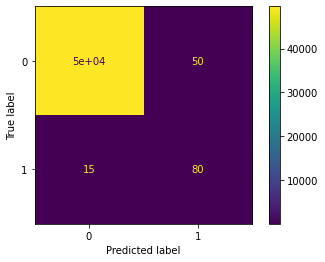

In [256]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

clf = LogisticRegression(random_state=0, class_weight={0: 1/10, 1: 9/10}).fit(X_train, y_train)
y_pred = clf.predict(X_val)
cm = confusion_matrix(y_val, y_pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot()

print("Predicted Probablity: ")
print(clf.predict_proba(X[:2, :]))
print("Coefficients: ")
clf.coef_

In [257]:
from sklearn.metrics import precision_recall_fscore_support
precision, recall, fbetascore, support = precision_recall_fscore_support(y_val, y_pred, average = "binary")
precision, recall, fbetascore, support

(0.6153846153846154, 0.8421052631578947, 0.7111111111111111, None)

In [251]:
clf = LogisticRegression(random_state=2, class_weight={0: 1/10, 1: 9/10}).fit(X, y)

ROC AUC score

In [218]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_val, clf.predict_proba(X_val)[:, 1])

0.9968236387855326

## XGBoost Classifier

[[9.9609685e-01 3.9031673e-03]
 [9.9997324e-01 2.6779520e-05]]


0.9993172827854863

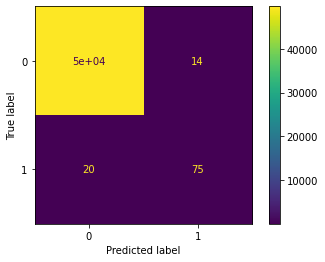

In [254]:
from xgboost import XGBClassifier

clf2 = XGBClassifier(max_depth = 4, rand_state = 2).fit(X_train, y_train)

     
y_pred = clf2.predict(X_val)
cm = confusion_matrix(y_val, y_pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot()

print(clf2.predict_proba(X[:2, :]))
clf2.score(X_val, y_val)

Precision and Recall

In [255]:
from sklearn.metrics import precision_recall_fscore_support
precision, recall, fbetascore, support = precision_recall_fscore_support(y_val, y_pred, average = "binary")
precision, recall, fbetascore, support

(0.8426966292134831, 0.7894736842105263, 0.8152173913043478, None)

ROC AUC Score

In [222]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_val, clf.predict_proba(X_val)[:, 1])

0.9968236387855326

In [249]:
clf2 = XGBClassifier(max_depth = 4, rand_state = 2).fit(X, y)

### Accuracy Criteria
Given a set of ocr outputs, and a table of user transactions,  we predict a row from the user transaction data to be the source for each ocr output. We calculate accuracy by dividing number of predictions equal to ground truth by total number of predictions

## Algorithm 1 
Compute similarity measure and pick the row with the highest similarity measure. This similarity measured is a linear combination of the four previous engineered features.

In [226]:
p1 = 1
p2 = 2 
p3 = 1 
p4 = 1 

# Compute similarity measure and pick the row with the highest similarity measure
def voteAlgo(user_rows, ocr_text):  
  all_scores = []
  datetimelist = list_potential_date(ocr_text)

  for i in range(len(user_rows)):
      user_row = user_rows.iloc[i]
      amount = user_row['amount']
      date = user_row['date']
      vendor_name = user_row['vendor_name']
      vendor_address = user_row['vendor_address']
      
      amount_score = eval_amount(amount, ocr_text)
      date_score = eval_date(date, datetimelist)
      vendor_name_score = eval_vendname(vendor_name, ocr_text)
      vendor_address_score = eval_address_score(vendor_address, ocr_text)

      total_score = p1 * amount_score + p2 * date_score + p3 * vendor_name_score + p4 * vendor_address_score
      all_scores.append(total_score)
  predict_row_idx = all_scores.index(max(all_scores))
  return predict_row_idx

def myAlgo(docID, ocrDict):
  ocrTxt = ocrDict[docID] 
  return voteAlgo(user_rows, ocrTxt)





## Performance on validation dataset

In [227]:
import numpy as np
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

user_rows = pd.read_csv('/content/drive/MyDrive/Datathon/Users.csv')
filestem = "/content/drive/MyDrive/Datathon/ocr-20230128T024910Z-001/ocr/"
ordered_documentid_array = np.array(user_rows["documentid"])
correct_predicted_array = np.arange(0, 499, 1)

def predict(pred_func, correct_predicted_array, all_ocr):
    predicted_array = np.zeros(correct_predicted_array.size)
    for idx in tqdm(range(ordered_documentid_array.size)):
        predicted_array[idx] = pred_func(ordered_documentid_array[idx], all_ocr)

    num_correct_choices = (predicted_array == correct_predicted_array).sum()
    assert (predicted_array.size == correct_predicted_array.size)
    print(num_correct_choices)
    print("Accuracy of the given model is {0} ".format(num_correct_choices / predicted_array.size))
    result = {ordered_documentid_array[i]: (predicted_array[i], correct_predicted_array[i]) for i in range(len(ordered_documentid_array))}
    return num_correct_choices / predicted_array.size, result

print(predict(myAlgo, correct_predicted_array, train_ocr_small))

100%|██████████| 499/499 [01:13<00:00,  6.75it/s]

436
Accuracy of the given model is 0.87374749498998 
(0.87374749498998, {'00d0624439175': (120.0, 0), '00d0654270874': (1.0, 1), '00d0403711886': (2.0, 2), '00d0956164753': (3.0, 3), '00d0667839698': (37.0, 4), '00d0841246769': (5.0, 5), '00d0414196980': (6.0, 6), '00d0726523245': (7.0, 7), '00d0320587587': (8.0, 8), '00d0333208815': (9.0, 9), '00d0330533884': (10.0, 10), '00d0694627982': (11.0, 11), '00d0408017404': (12.0, 12), '00d0447521528': (13.0, 13), '00d0194076657': (14.0, 14), '00d0546591203': (15.0, 15), '00d0116292534': (16.0, 16), '00d0796308197': (17.0, 17), '00d0992127574': (18.0, 18), '00d0961798581': (19.0, 19), '00d0267909555': (20.0, 20), '00d0973462000': (21.0, 21), '00d0280864237': (22.0, 22), '00d0697219524': (23.0, 23), '00d0145695018': (24.0, 24), '00d0330285744': (25.0, 25), '00d0477960526': (26.0, 26), '00d0955195431': (27.0, 27), '00d0167381962': (28.0, 28), '00d0614628355': (29.0, 29), '00d0761346037': (30.0, 30), '00d0502129574': (31.0, 31), '00d0686078737':

## Performance on test set

In [232]:
import numpy as np
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

user_rows = pd.read_csv('/content/drive/MyDrive/Datathon/test_transactions.csv')
filestem = "/content/drive/MyDrive/Datathon/ocr-20230128T024910Z-001/ocr/"
ordered_documentid_array = np.array(user_rows["documentid"])
correct_predicted_array = np.arange(0, 126, 1)

def predict(pred_func, correct_predicted_array, all_ocr):
    predicted_array = np.zeros(correct_predicted_array.size)
    for idx in tqdm(range(ordered_documentid_array.size)):
        predicted_array[idx] = pred_func(ordered_documentid_array[idx], all_ocr)

    num_correct_choices = (predicted_array == correct_predicted_array).sum()

    assert (predicted_array.size == correct_predicted_array.size)
    print(num_correct_choices)
    print("Accuracy of the given model is {0} ".format(num_correct_choices / predicted_array.size))
    result = {ordered_documentid_array[i]: (predicted_array[i], correct_predicted_array[i]) for i in range(len(ordered_documentid_array))}
    return num_correct_choices / predicted_array.size, result

print(predict(myAlgo, correct_predicted_array, test_ocr))

100%|██████████| 126/126 [00:04<00:00, 26.59it/s]


118
Accuracy of the given model is 0.9365079365079365 
(0.9365079365079365, {'00d0472780579': (0.0, 0), '00d0269258457': (31.0, 1), '00d0145054354': (2.0, 2), '00d0795468800': (3.0, 3), '00d0682248746': (4.0, 4), '00d0471112949': (5.0, 5), '00d0472591457': (6.0, 6), '00d0354593861': (7.0, 7), '00d0179226173': (8.0, 8), '00d0277307035': (9.0, 9), '00d0902256238': (10.0, 10), '00d0230547657': (11.0, 11), '00d0859401532': (12.0, 12), '00d0343958098': (13.0, 13), '00d0676711962': (14.0, 14), '00d0114666542': (35.0, 15), '00d0507143553': (16.0, 16), '00d0622420051': (109.0, 17), '00d0831446713': (18.0, 18), '00d0472127340': (19.0, 19), '00d0164203891': (20.0, 20), '00d0343123955': (21.0, 21), '00d0714317145': (22.0, 22), '00d0443302756': (23.0, 23), '00d0484705589': (24.0, 24), '00d0415751725': (25.0, 25), '00d0726056883': (18.0, 26), '00d0916006350': (27.0, 27), '00d0660852423': (28.0, 28), '00d0811301203': (25.0, 29), '00d0741622526': (30.0, 30), '00d0204688228': (31.0, 31), '00d011521491

## Algorithm 2 Logistic Regression
Use logistic regression to predict a probability of having a match between the given ocr text and the row in transaction data. Pick the row with highest probability as prediction result.

In [233]:
def voteAlgo2(user_rows, ocr_text):
    all_scores = []
    datetimelist = list_potential_date(ocr_text)

    for i in range(len(user_rows)):
        user_row = user_rows.iloc[i]
        amount = user_row['amount']
        date = user_row['date']
        vendor_name = user_row['vendor_name']
        vendor_address = user_row['vendor_address']
        
        amount_score = eval_amount(amount, ocr_text)
        date_score = eval_date(date, datetimelist)
        vendor_name_score = eval_vendname(vendor_name, ocr_text)
        vendor_address_score = eval_address_score(vendor_address, ocr_text)
        result = clf.predict_proba(np.array([amount_score, vendor_name_score, vendor_address_score, date_score]).reshape(1, -1))
        result = np.array(result)
        total_score = result[0][1]
        
        all_scores.append(total_score)
    predict_row_idx = all_scores.index(max(all_scores))
    return predict_row_idx

def myAlgo2(docID, ocrDict):
  ocrTxt = ocrDict[docID] 
  return voteAlgo2(user_rows, ocrTxt)

## Performance on validation dataset

In [ ]:
import numpy as np
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

user_rows = pd.read_csv('/content/drive/MyDrive/Datathon/Users.csv')
filestem = "/content/drive/MyDrive/Datathon/ocr-20230128T024910Z-001/ocr/"
ordered_documentid_array = np.array(user_rows["documentid"])
correct_predicted_array = np.arange(0, 499, 1)

def predict(pred_func, correct_predicted_array, all_ocr):
    predicted_array = np.zeros(correct_predicted_array.size)
    for idx in tqdm(range(ordered_documentid_array.size)):
        predicted_array[idx] = pred_func(ordered_documentid_array[idx], all_ocr)

    num_correct_choices = (predicted_array == correct_predicted_array).sum()
    assert (predicted_array.size == correct_predicted_array.size)
    print(num_correct_choices)
    print("Accuracy of the given model is {0} ".format(num_correct_choices / predicted_array.size))
    result = {ordered_documentid_array[i]: (predicted_array[i], correct_predicted_array[i]) for i in range(len(ordered_documentid_array))}
    return num_correct_choices / predicted_array.size, result

print(predict(myAlgo2, correct_predicted_array, train_ocr_small))

100%|██████████| 499/499 [02:10<00:00,  3.84it/s]

442
Accuracy of the given model is 0.8857715430861723 
(0.8857715430861723, {'00d0624439175': (120.0, 0), '00d0654270874': (1.0, 1), '00d0403711886': (2.0, 2), '00d0956164753': (3.0, 3), '00d0667839698': (311.0, 4), '00d0841246769': (5.0, 5), '00d0414196980': (6.0, 6), '00d0726523245': (7.0, 7), '00d0320587587': (8.0, 8), '00d0333208815': (9.0, 9), '00d0330533884': (10.0, 10), '00d0694627982': (11.0, 11), '00d0408017404': (12.0, 12), '00d0447521528': (13.0, 13), '00d0194076657': (14.0, 14), '00d0546591203': (15.0, 15), '00d0116292534': (16.0, 16), '00d0796308197': (17.0, 17), '00d0992127574': (18.0, 18), '00d0961798581': (19.0, 19), '00d0267909555': (20.0, 20), '00d0973462000': (21.0, 21), '00d0280864237': (22.0, 22), '00d0697219524': (23.0, 23), '00d0145695018': (24.0, 24), '00d0330285744': (25.0, 25), '00d0477960526': (26.0, 26), '00d0955195431': (27.0, 27), '00d0167381962': (28.0, 28), '00d0614628355': (29.0, 29), '00d0761346037': (30.0, 30), '00d0502129574': (31.0, 31), '00d0686078

## Performance on test set

In [253]:
import numpy as np
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

user_rows = pd.read_csv('/content/drive/MyDrive/Datathon/test_transactions.csv')
filestem = "/content/drive/MyDrive/Datathon/ocr-20230128T024910Z-001/ocr/"
ordered_documentid_array = np.array(user_rows["documentid"])
correct_predicted_array = np.arange(0, 126, 1)

def predict(pred_func, correct_predicted_array, all_ocr):
    predicted_array = np.zeros(correct_predicted_array.size)
    for idx in tqdm(range(ordered_documentid_array.size)):
        predicted_array[idx] = pred_func(ordered_documentid_array[idx], all_ocr)

    num_correct_choices = (predicted_array == correct_predicted_array).sum()
    assert (predicted_array.size == correct_predicted_array.size)
    print(num_correct_choices)
    print("Accuracy of the given model is {0} ".format(num_correct_choices / predicted_array.size))
    result = {ordered_documentid_array[i]: (predicted_array[i], correct_predicted_array[i]) for i in range(len(ordered_documentid_array))}
    return num_correct_choices / predicted_array.size, result

print(predict(myAlgo2, correct_predicted_array, test_ocr))

100%|██████████| 126/126 [00:08<00:00, 14.04it/s]

120
Accuracy of the given model is 0.9523809523809523 
(0.9523809523809523, {'00d0472780579': (0.0, 0), '00d0269258457': (31.0, 1), '00d0145054354': (2.0, 2), '00d0795468800': (3.0, 3), '00d0682248746': (4.0, 4), '00d0471112949': (5.0, 5), '00d0472591457': (6.0, 6), '00d0354593861': (7.0, 7), '00d0179226173': (8.0, 8), '00d0277307035': (9.0, 9), '00d0902256238': (10.0, 10), '00d0230547657': (11.0, 11), '00d0859401532': (12.0, 12), '00d0343958098': (13.0, 13), '00d0676711962': (14.0, 14), '00d0114666542': (35.0, 15), '00d0507143553': (16.0, 16), '00d0622420051': (17.0, 17), '00d0831446713': (18.0, 18), '00d0472127340': (19.0, 19), '00d0164203891': (20.0, 20), '00d0343123955': (21.0, 21), '00d0714317145': (22.0, 22), '00d0443302756': (23.0, 23), '00d0484705589': (24.0, 24), '00d0415751725': (25.0, 25), '00d0726056883': (18.0, 26), '00d0916006350': (27.0, 27), '00d0660852423': (28.0, 28), '00d0811301203': (29.0, 29), '00d0741622526': (30.0, 30), '00d0204688228': (31.0, 31), '00d0115214912

## Algorithm 3 XGBoost Classifier

Use XGboost classifier (a gradient boosted ensemble method) to predict a probability of having a match between the given ocr text and the row in transaction data. Pick the row with highest probability as prediction result.

In [246]:
def voteAlgo3(user_rows, ocr_text):
    all_scores = []
    datetimelist = list_potential_date(ocr_text)

    for i in range(len(user_rows)):
        user_row = user_rows.iloc[i]
        amount = user_row['amount']
        date = user_row['date']
        vendor_name = user_row['vendor_name']
        vendor_address = user_row['vendor_address']
        
        amount_score = eval_amount(amount, ocr_text)
        date_score = eval_date(date, datetimelist)
        vendor_name_score = eval_vendname(vendor_name, ocr_text)
        vendor_address_score = eval_address_score(vendor_address, ocr_text)
        result = clf2.predict_proba(np.array([amount_score, vendor_name_score, vendor_address_score, date_score]).reshape(1, -1))
        result = np.array(result)
        total_score = result[0][1]
        
        all_scores.append(total_score)
    predict_row_idx = all_scores.index(max(all_scores))
    return predict_row_idx

def myAlgo3(docID, ocrDict):
  ocrTxt = ocrDict[docID] 
  return voteAlgo3(user_rows, ocrTxt)

## Performance on validation dataset

In [252]:
import numpy as np
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

user_rows = pd.read_csv('/content/drive/MyDrive/Datathon/Users.csv')
filestem = "/content/drive/MyDrive/Datathon/ocr-20230128T024910Z-001/ocr/"
ordered_documentid_array = np.array(user_rows["documentid"])
correct_predicted_array = np.arange(0, 499, 1)

def predict(pred_func, correct_predicted_array, all_ocr):
    predicted_array = np.zeros(correct_predicted_array.size)
    for idx in tqdm(range(ordered_documentid_array.size)):
        predicted_array[idx] = pred_func(ordered_documentid_array[idx], all_ocr)

    num_correct_choices = (predicted_array == correct_predicted_array).sum()
    assert (predicted_array.size == correct_predicted_array.size)
    print(num_correct_choices)
    print("Accuracy of the given model is {0} ".format(num_correct_choices / predicted_array.size))
    result = {ordered_documentid_array[i]: (predicted_array[i], correct_predicted_array[i]) for i in range(len(ordered_documentid_array))}
    return num_correct_choices / predicted_array.size, result

print(predict(myAlgo3, correct_predicted_array, train_ocr_small))

100%|██████████| 499/499 [01:53<00:00,  4.38it/s]

457
Accuracy of the given model is 0.9158316633266533 
(0.9158316633266533, {'00d0624439175': (120.0, 0), '00d0654270874': (1.0, 1), '00d0403711886': (2.0, 2), '00d0956164753': (3.0, 3), '00d0667839698': (234.0, 4), '00d0841246769': (5.0, 5), '00d0414196980': (6.0, 6), '00d0726523245': (7.0, 7), '00d0320587587': (8.0, 8), '00d0333208815': (9.0, 9), '00d0330533884': (10.0, 10), '00d0694627982': (11.0, 11), '00d0408017404': (12.0, 12), '00d0447521528': (13.0, 13), '00d0194076657': (40.0, 14), '00d0546591203': (15.0, 15), '00d0116292534': (16.0, 16), '00d0796308197': (17.0, 17), '00d0992127574': (18.0, 18), '00d0961798581': (19.0, 19), '00d0267909555': (20.0, 20), '00d0973462000': (21.0, 21), '00d0280864237': (22.0, 22), '00d0697219524': (23.0, 23), '00d0145695018': (24.0, 24), '00d0330285744': (25.0, 25), '00d0477960526': (26.0, 26), '00d0955195431': (27.0, 27), '00d0167381962': (28.0, 28), '00d0614628355': (29.0, 29), '00d0761346037': (30.0, 30), '00d0502129574': (31.0, 31), '00d0686078

## Performance on test set

In [250]:
import numpy as np
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

user_rows = pd.read_csv('/content/drive/MyDrive/Datathon/test_transactions.csv')
filestem = "/content/drive/MyDrive/Datathon/ocr-20230128T024910Z-001/ocr/"
ordered_documentid_array = np.array(user_rows["documentid"])
correct_predicted_array = np.arange(0, 126, 1)

def predict(pred_func, correct_predicted_array, all_ocr):
    predicted_array = np.zeros(correct_predicted_array.size)
    for idx in tqdm(range(ordered_documentid_array.size)):
        predicted_array[idx] = pred_func(ordered_documentid_array[idx], all_ocr)

    num_correct_choices = (predicted_array == correct_predicted_array).sum()

    assert (predicted_array.size == correct_predicted_array.size)
    print(num_correct_choices)
    print("Accuracy of the given model is {0} ".format(num_correct_choices / predicted_array.size))
    result = {ordered_documentid_array[i]: (predicted_array[i], correct_predicted_array[i]) for i in range(len(ordered_documentid_array))}
    return num_correct_choices / predicted_array.size, result

print(predict(myAlgo3, correct_predicted_array, all_ocr))

100%|██████████| 126/126 [00:09<00:00, 13.78it/s]

121
Accuracy of the given model is 0.9603174603174603 
(0.9603174603174603, {'00d0472780579': (0.0, 0), '00d0269258457': (102.0, 1), '00d0145054354': (2.0, 2), '00d0795468800': (3.0, 3), '00d0682248746': (4.0, 4), '00d0471112949': (5.0, 5), '00d0472591457': (6.0, 6), '00d0354593861': (7.0, 7), '00d0179226173': (8.0, 8), '00d0277307035': (9.0, 9), '00d0902256238': (10.0, 10), '00d0230547657': (11.0, 11), '00d0859401532': (12.0, 12), '00d0343958098': (13.0, 13), '00d0676711962': (14.0, 14), '00d0114666542': (35.0, 15), '00d0507143553': (16.0, 16), '00d0622420051': (17.0, 17), '00d0831446713': (18.0, 18), '00d0472127340': (19.0, 19), '00d0164203891': (20.0, 20), '00d0343123955': (21.0, 21), '00d0714317145': (22.0, 22), '00d0443302756': (23.0, 23), '00d0484705589': (24.0, 24), '00d0415751725': (25.0, 25), '00d0726056883': (33.0, 26), '00d0916006350': (27.0, 27), '00d0660852423': (28.0, 28), '00d0811301203': (29.0, 29), '00d0741622526': (30.0, 30), '00d0204688228': (31.0, 31), '00d011521491